In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [3]:
df1 = df.drop(['day','month','default','contact','balance'], axis='columns')
df1.head()

,age,job,marital,education,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,yes,no,113,1,50,2,success,no
1,41,housemaid,married,primary,no,no,203,5,-1,0,unknown,no
2,39,management,single,tertiary,yes,no,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,yes,no,549,1,-1,0,unknown,no
4,37,services,married,secondary,yes,yes,404,2,251,6,failure,no


DROPPING DEPOSIT FOR Y_TRAIN

In [4]:
df2 = df1.drop(['deposit'], axis='columns')

y = df1['deposit']


separating the string columns for creation of dummy columns

In [5]:
only_str = df2.select_dtypes(exclude='number')
df2.drop(only_str, inplace=True, axis='columns')
df2.head()

,age,duration,campaign,pdays,previous
0,38,113,1,50,2
1,41,203,5,-1,0
2,39,716,3,263,2
3,49,549,1,-1,0
4,37,404,2,251,6


In [6]:
only_str.head()

,job,marital,education,housing,loan,poutcome
0,technician,married,tertiary,yes,no,success
1,housemaid,married,primary,no,no,unknown
2,management,single,tertiary,yes,no,failure
3,blue-collar,married,primary,yes,no,unknown
4,services,married,secondary,yes,yes,failure


separating both columns housing and loan as both have yes and no as output

In [7]:
only_str_separate = only_str.drop(['job','marital','education','poutcome'], axis='columns')
only_str_separate.head()

,housing,loan
0,yes,no
1,no,no
2,yes,no
3,yes,no
4,yes,yes


In [8]:
dummies1 = pd.get_dummies(only_str_separate['housing'], drop_first=True)
dummies1.rename(columns={'yes': "housing_yes"}, inplace=True)

dummies2 = pd.get_dummies(only_str_separate['loan'], drop_first=True)
dummies2.rename(columns={'yes': "loan_yes"}, inplace=True)

df2 = pd.concat([dummies1,dummies2, df2], axis="columns")
df2.head()

,housing_yes,loan_yes,age,duration,campaign,pdays,previous
0,1,0,38,113,1,50,2
1,0,0,41,203,5,-1,0
2,1,0,39,716,3,263,2
3,1,0,49,549,1,-1,0
4,1,1,37,404,2,251,6


In [9]:
only_str.drop(['housing','loan'],inplace=True, axis="columns")
only_str.head()

,job,marital,education,poutcome
0,technician,married,tertiary,success
1,housemaid,married,primary,unknown
2,management,single,tertiary,failure
3,blue-collar,married,primary,unknown
4,services,married,secondary,failure


In [10]:
only_str.columns

Index(['job', 'marital', 'education', 'poutcome'], dtype='object')

DEALING WITH THE UNKNOWN VALUES 
BY REPLACING THEM WITH THE VALUES THAT APPEARED MOST OF THE TIMES OTHER THAN UNKNOWN
AND CREATING DUMMY VARIABLES

In [11]:
for col in only_str.columns:
    count = 0
    max_app = ""
    # print(only_str[col].unique())
    for cell in only_str[col].unique():
        if(cell != "unknown"):
            length = len(only_str[only_str[col]==cell])
            if(count < length):
                max_app = cell

    
    only_str[col] = only_str[col].apply(lambda x:max_app if x=='unknown' else x)

    dummies = pd.get_dummies(only_str[col], drop_first=True)
    df2 = pd.concat([dummies,df2],axis='columns')

In [12]:
df2.columns

Index(['other', 'success', 'secondary', 'tertiary', 'married', 'single',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'housing_yes', 'loan_yes', 'age', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [13]:
# for col in only_str.columns:
#     dummies = pd.get_dummies(only_str[col], drop_first=True)
#     df2 = pd.concat([dummies,df2],axis='columns')
df2.head()
    

,other,success,secondary,tertiary,married,single,blue-collar,entrepreneur,housemaid,management,...,student,technician,unemployed,housing_yes,loan_yes,age,duration,campaign,pdays,previous
0,0,1,0,1,1,0,0,0,0,0,...,0,1,0,1,0,38,113,1,50,2
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,41,203,5,-1,0
2,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,39,716,3,263,2
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,49,549,1,-1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,37,404,2,251,6


In [14]:
X = df2;
X.shape

(8371, 23)

creating and training model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
model_params = {
    'svm': {
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
res = pd.DataFrame(scores,columns=['model','best_score','best_params'])
res

In [ ]:
model = LogisticRegression(solver='liblinear',multi_class='auto', C=1)
model.fit(X,y)

LogisticRegression(C=1, solver='liblinear')

CONFUSSION MATRIX AND THE CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns

# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
model1 = LogisticRegression(solver='liblinear',multi_class='auto', C=1)
model1.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [ ]:
model.predict(X_test)

array(['yes', 'yes', 'yes', ..., 'no', 'no', 'yes'], dtype=object)

In [ ]:
model.score(X_test,y_test)

0.7898507462686567

In [ ]:
truth = y_test
prediction = model.predict(X_test)

CONFUSION MATRIX

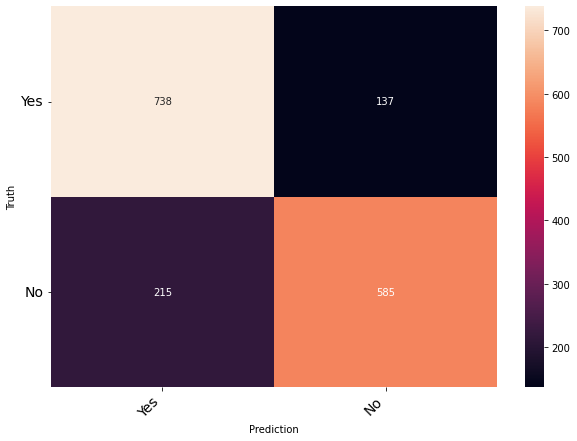

In [ ]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Yes","No"])

In [ ]:

true_positive = 738
false_positive = 137
true_negetive = 584
false_negetive = 216

precision = true_positive/(true_positive + false_positive)
recall = true_positive/(true_positive + false_negetive)
f1_score = 2*(precision * recall)/(precision + recall)

print("presicion = ", precision)
print("recall = ", recall)
print("f1_score = ",f1_score)

presicion =  0.8434285714285714
recall =  0.7735849056603774
f1_score =  0.8069983597594313


CLASSIFICATION REPORT

In [ ]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

          no       0.77      0.84      0.81       875
         yes       0.81      0.73      0.77       800

    accuracy                           0.79      1675
   macro avg       0.79      0.79      0.79      1675
weighted avg       0.79      0.79      0.79      1675



In [ ]:
# # f1 score of YES
# f1_score_for_yes = 2*(0.81 * 0.73)/(0.81 + 0.73)
# f1_score_for_yes

In [ ]:
# #f1 score of No
# f1_score_for_no = 2*(0.77 * 0.84)/(0.77 + 0.84)
# f1_score_for_no

preparing and cleaning the test csv  data

In [ ]:
dft = pd.read_csv('test_data.csv')
test_df = dft
test_df.shape

(2791, 16)

In [ ]:
test_df = test_df.drop(['day','month','default','contact','balance'], axis='columns')
test_df.head()

,age,job,marital,education,housing,loan,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,no,no,426,2,189,6,failure
1,49,blue-collar,married,primary,no,no,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,yes,200,1,-1,0,unknown
3,33,technician,married,secondary,yes,no,703,1,-1,0,unknown
4,34,admin.,married,secondary,yes,no,125,2,-1,0,unknown


In [ ]:
only_str = test_df.select_dtypes(exclude='number')
test_df.drop(only_str, inplace=True, axis='columns')
test_df.head()

,age,duration,campaign,pdays,previous
0,31,426,2,189,6
1,49,464,1,-1,0
2,51,200,1,-1,0
3,33,703,1,-1,0
4,34,125,2,-1,0


In [ ]:
only_str.head()

,job,marital,education,housing,loan,poutcome
0,blue-collar,single,secondary,no,no,failure
1,blue-collar,married,primary,no,no,unknown
2,self-employed,single,tertiary,no,yes,unknown
3,technician,married,secondary,yes,no,unknown
4,admin.,married,secondary,yes,no,unknown


In [ ]:
only_str_separate = only_str.drop(['job','marital','education','poutcome','job','education'], axis='columns')
only_str_separate.head()

,housing,loan
0,no,no
1,no,no
2,no,yes
3,yes,no
4,yes,no


In [ ]:
dummies1 = pd.get_dummies(only_str_separate['housing'], drop_first=True)
dummies1.rename(columns={'yes': "housing_yes"}, inplace=True)

dummies2 = pd.get_dummies(only_str_separate['loan'], drop_first=True)
dummies2.rename(columns={'yes': "loan_yes"}, inplace=True)

test_df = pd.concat([dummies1,dummies2, test_df], axis="columns")
test_df.head()

,housing_yes,loan_yes,age,duration,campaign,pdays,previous
0,0,0,31,426,2,189,6
1,0,0,49,464,1,-1,0
2,0,1,51,200,1,-1,0
3,1,0,33,703,1,-1,0
4,1,0,34,125,2,-1,0


In [ ]:
only_str.drop(['housing','loan'],inplace=True, axis="columns")
only_str.head()

,job,marital,education,poutcome
0,blue-collar,single,secondary,failure
1,blue-collar,married,primary,unknown
2,self-employed,single,tertiary,unknown
3,technician,married,secondary,unknown
4,admin.,married,secondary,unknown


In [ ]:
only_str.columns

Index(['job', 'marital', 'education', 'poutcome'], dtype='object')

In [ ]:
for col in only_str.columns:
    count = 0
    max_app = ""
    for cell in only_str[col].unique():
        if(cell!="unknown"):
            length = len(only_str[only_str[col]==cell])
            if(count < length):
                max_app = cell
    
    only_str[col] = only_str[col].apply(lambda x:max_app if x=='unknown' else x)

    dummies = pd.get_dummies(only_str[col], drop_first=True)
    test_df = pd.concat([dummies,test_df],axis='columns')


In [ ]:
# for col in only_str.columns:
#     dummies = pd.get_dummies(only_str[col], drop_first=True)
#     test_df = pd.concat([dummies,test_df],axis='columns')

test_df.head()

,other,success,secondary,tertiary,married,single,blue-collar,entrepreneur,housemaid,management,...,student,technician,unemployed,housing_yes,loan_yes,age,duration,campaign,pdays,previous
0,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,31,426,2,189,6
1,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,49,464,1,-1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,51,200,1,-1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,33,703,1,-1,0
4,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,34,125,2,-1,0


In [ ]:
test_df.columns

Index(['other', 'success', 'secondary', 'tertiary', 'married', 'single',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'housing_yes', 'loan_yes', 'age', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [ ]:
X_test = test_df

In [ ]:
y_test = model.predict(X_test)

In [ ]:
result = pd.DataFrame()
result['deposit'] = y_test

result.to_csv('result.csv')

In [ ]:
dft['deposit'] = y_test
dft.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure,yes
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown,yes
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown,no
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown,yes
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown,no
5,49,admin.,divorced,secondary,no,2999,yes,no,cellular,17,may,717,1,-1,0,unknown,yes
6,22,admin.,single,secondary,no,33,no,no,cellular,12,feb,369,1,-1,0,unknown,yes
7,42,blue-collar,divorced,primary,no,419,yes,yes,unknown,14,may,96,4,-1,0,unknown,no
8,27,management,single,tertiary,no,446,no,no,cellular,23,jun,205,3,-1,0,unknown,no
9,49,blue-collar,married,secondary,no,598,yes,no,cellular,15,may,219,6,-1,0,unknown,no


In [ ]:
dft.shape

(2791, 17)